In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import re 
from datetime import date, datetime
import numpy as np

In [2]:
plt.style.use('seaborn')
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 16}

plt.rc('font', **font)
plt.rcParams.update({'font.size': 16})


# Task 1: Explore a small dataset
### Task 1A: Exploration

In [3]:
df = pd.read_csv("data/ODI-2020.csv", sep=';')

# rename to normal column names for easier referencing later
df.columns=["program", "ml_course", "ir_course", "stat_course", "db_course", "gender",
                "chocolate", "birthday", "neighbors", "standed_up", "stress", "local_dm_comp", "random_number",
                "bedtime_yesterday", "happy1", "happy2"]
display(df)

,program,ml_course,ir_course,stat_course,db_course,gender,chocolate,birthday,neighbors,standed_up,stress,local_dm_comp,random_number,bedtime_yesterday,happy1,happy2
0,Computational Science,no,unknown,mu,ja,female,fat,05-08-1998,0,no,0,4,227,22:30,Good weather,Sporting
1,Quantitative Risk Management,no,0,mu,nee,male,unknown,1996,2,no,85,25,65,23:05,chill,coffee
2,MSc Computational Science,no,0,mu,ja,female,neither,12th June,4,no,50,10,3,10pm,Waking up early and preparing for the day by p...,Using the early morning time to study
3,MSc Finance - QRM,no,0,mu,nee,female,neither,19-06-1994,0,no,10,99,2,23,eating good food,spending time with friends
4,BA,yes,0,mu,ja,male,neither,29-09-1993,0,no,60,80,7,22:00,Sun is shining,Intimate contact with friends and family
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
275,Mechenaical Engineering,yes,1,mu,nee,male,fat,17-09-1993,2,no,69,5,6,1:00,no corona,no corona 2
276,CS,no,0,mu,ja,male,fat,28/10,0,no,10,100,7,21:45,Netflix,Chill
277,Artificial Intelligence,yes,1,mu,ja,male,neither,26-07-1994,12,yes,60,75,42,13:37,Finishing all tasks,Finding an extra package of ice cream
278,Artificial Intelligence,no,0,mu,nee,female,neither,3/4/1998,1,no,70,2,69,00:00,Food,Orgasm


### Clean

In [4]:
# clean up open questions: master can be CLS/computational science/Computational Science/Master Computational Science, etc.
import string

df = pd.read_csv("data/ODI-2020.csv", sep=';')

# rename to normal column names for easier referencing later
df.columns=["program", "ml_course", "ir_course", "stat_course", "db_course", "gender",
                "chocolate", "birthday", "neighbors", "standed_up", "stress", "local_dm_comp", "random_number",
                "bedtime_yesterday", "happy1", "happy2"]
display(df)


print("Unique progams:", len(df.program.unique()))
print("Changing everything to lowercase")
df.program = df.program.map(str.lower)

print("Unique progams:", len(df.program.unique()))
print("Deleting all punctuation")
# text = text.translate()

df.program = df.program.map(lambda s: s.translate(str.maketrans('','', string.punctuation)))
print("Unique progams:", len(df.program.unique()))


print("\n\n\n")

for index, row in df.iterrows():
    if "computational" in row.program or "cls" in row.program:
        row.program = "CLS"
    elif "artificial" in row.program or "ai" in row.program:
        row.program = "AI"
    elif "computer science" in row.program or "cs" in row.program:
        row.program = "CS"
    elif "quantitative risk management" in row.program or "qrm" in row.program:
        row.program = "QRM"
    
print("Unique progams:", len(df.program.unique()))
print(df.program.unique())

,program,ml_course,ir_course,stat_course,db_course,gender,chocolate,birthday,neighbors,standed_up,stress,local_dm_comp,random_number,bedtime_yesterday,happy1,happy2
0,Computational Science,no,unknown,mu,ja,female,fat,05-08-1998,0,no,0,4,227,22:30,Good weather,Sporting
1,Quantitative Risk Management,no,0,mu,nee,male,unknown,1996,2,no,85,25,65,23:05,chill,coffee
2,MSc Computational Science,no,0,mu,ja,female,neither,12th June,4,no,50,10,3,10pm,Waking up early and preparing for the day by p...,Using the early morning time to study
3,MSc Finance - QRM,no,0,mu,nee,female,neither,19-06-1994,0,no,10,99,2,23,eating good food,spending time with friends
4,BA,yes,0,mu,ja,male,neither,29-09-1993,0,no,60,80,7,22:00,Sun is shining,Intimate contact with friends and family
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
275,Mechenaical Engineering,yes,1,mu,nee,male,fat,17-09-1993,2,no,69,5,6,1:00,no corona,no corona 2
276,CS,no,0,mu,ja,male,fat,28/10,0,no,10,100,7,21:45,Netflix,Chill
277,Artificial Intelligence,yes,1,mu,ja,male,neither,26-07-1994,12,yes,60,75,42,13:37,Finishing all tasks,Finding an extra package of ice cream
278,Artificial Intelligence,no,0,mu,nee,female,neither,3/4/1998,1,no,70,2,69,00:00,Food,Orgasm


Unique progams: 123
Changing everything to lowercase
Unique progams: 108
Deleting all punctuation
Unique progams: 105




Unique progams: 37
['CLS' 'QRM' 'ba' 'CS'
 'master business administration digital business and innovation' 'AI'
 'msc digital business and innovation vu'
 'digital business and innovation' 'finance  technology'
 'business administration' 'scientific computing'
 'digital business  innovation'
 'masters in parallel and distributed computer systems'
 'information sciences' 'finance and technology' 'master of finance'
 'exchange' 'big data engineering'
 'master digital business  innovation sbe' 'health sciences'
 'human movement science research master' 'human language technology'
 'finance' 'information sciences msc' 'msc'
 'information studies data science track at uva'
 'information studies track information systems'
 'research master human language technology' 'eor'
 'human language technologies humanities research' 'msc datascience uva'
 'information science uva' 

In [5]:
# Clean birthday
df_new = df.copy()
df_new["age"] = np.nan

def calculateAge(birthDate): 
    today = date.today() 
    return today.year - birthDate.year - ((today.month, today.day) < (birthDate.month, birthDate.day)) 

for index,row in df_new.iterrows():
    line = re.split("-|/|th|of|''|' ' ", row["birthday"])
    if len(line) == 1:
        line = line[0].split(".")

    if len(line) == 1:
        if line[0].startswith('199') or line[0].startswith('198'):
            year = int(line[0])

            if year > 1900 and year < 2010:
                date_str = date(year, 1, 1)
                age = calculateAge(date_str)
    
    elif len(line) == 3 and ' ' not in line:
        for i in range(len(line)): 
            if line[i] == "march ": 
                line[i] = 3
        line = [int(i) for i in line] 
        year, month, day = line[2], line[1], line[0]
        
        # For entries of '94' in stead of '1994'
        if year > 60 and year < 1900:
            year = int('19' + str(year))
            
         # Calculate date with year - month - day
        try:
            date_str = date(year, month, day)
            age = calculateAge(date_str)
            
            # Exclude wrong data
            if age == 0:
                continue
    
        except ValueError:
            date_str = np.nan
            age = np.nan
            continue
        
    # Add new column of 'age'
    df_new.birthday[index] = date_str
    df_new.age[index] = age

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:48: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [6]:
# Further cleaning

# ml_course
# array(['no', 'yes', 'unknown'], dtype=object)

# ir_course
# array(['unknown', '0', '1'], dtype=object) where 0 is no, 1 is yes

# stat_course
# array(['mu', 'sigma', 'unknown'], dtype=object) mu is yes, sigma is no

# db_course
# array(['ja', 'nee', 'unknown'], dtype=object)

# gender
# array(['female', 'male', 'unknown'], dtype=object)

# chocolate
# array(['fat', 'unknown', 'neither', 'I have no idea what you are talking about', 'slim'], dtype=object)

# neighbors
# convert values to integers if possible, else 'nan'
cleaned_neighbors = []
for nr in df_new['neighbors']:
    try:
        cleaned_neighbors.append(int(nr))
    except:
        cleaned_neighbors.append(np.nan)

# replace old column by cleaned one
df_new['neighbors'] = cleaned_neighbors

# standed_up = array(['no', 'unknown', 'yes'], dtype=object)

# stress
cleaned_stress = []
for nr in df_new['stress']:
    try:
        new = int(nr)
        if new < 0 or new > 100:
            cleaned_stress.append(np.nan)
        else:
            cleaned_stress.append(new)
    except:
        cleaned_stress.append(np.nan)

# replace old column by cleaned one
df_new['stress'] = cleaned_stress

# local_dm_comp
# TODO

# random_number
# Note: check for outliers, they are highly influencing the mean
cleaned_random = []
for index, row in df.iterrows():
    try:
        cleaned_random.append(int(row['random_number']))
    except:
        cleaned_random.append(np.nan)

# replace old column by cleaned one
df_new['random_number'] = cleaned_random


# bedtime_yesterday
# for now only accepting completely numeric (+ ":") entries, that is 151 of 280 entries
# first convert entries to strings
cleaned_bedtime_strings = []
for index,row in df_new.iterrows():
    incorrect = False
    value = str(row['bedtime_yesterday'])
    for letter in value:
        if letter != ':':
            try:
                int(letter)
            except:
                incorrect = True
    if not incorrect:
        cleaned_bedtime_strings.append(value)
    else:
        cleaned_bedtime_strings.append(np.nan)

# convert strings to time objects, else make it nan
time_objects = []
c = 0
for item in cleaned_bedtime_strings:
    if item != item:
        time_objects.append(np.nan)
    elif ':' in item and len(item) == 5:
        try:
            time_objects.append(datetime.strptime(item, '%H:%M').time())
            c += 1
        except:
            time_objects.append(np.nan)
    else:
        time_objects.append(np.nan)

    
# replace old column by cleaned one
df_new['bedtime_yesterday'] = time_objects

    
# happy1 & happy 2 
# voeg columns 'sun' en 'food' toe aan dataframe, 
# sun: 1 = 'sun' of 'weather' komt voor in happy1 of happy2, 0 = komt niet voor
# food: 1 = 'food' of 'choc' komt voor in happy1 of happy2, 0 = komt niet voor
# ik heb ook overwogen te checken of 'corona' veel genoemd wordt, maar dat werd maar 4x genoemd dus niet erin gedaan
sun = []
food = []
c = 0
for index,row in df_new.iterrows():
    if 'sun' in str(row['happy2']).lower() or 'weather' in str(row['happy2']).lower() or 'sun' in str(row['happy1']).lower() or 'weather' in str(row['happy1']).lower():
        sun.append(1)
    else:
        sun.append(0)
    if 'food' in str(row['happy1']).lower() or 'food' in str(row['happy2']).lower() or 'choc' in str(row['happy1']).lower() or 'choc' in str(row['happy2']).lower():
        food.append(1)
    else:
        food.append(0)

df_new['sun'] = sun
df_new['food'] = food

In [7]:
# Cut into stress categories
df_new['stress_band'] = pd.cut(df_new['stress'], 6)

In [8]:
df_new.loc[ df_new['stress'] <= 10, 'stress'] = 0
df_new.loc[(df_new['stress'] > 10) & (df_new['stress'] <= 20), 'stress'] = 1
df_new.loc[(df_new['stress'] > 20) & (df_new['stress'] <= 30), 'stress'] = 2
df_new.loc[(df_new['stress'] > 30) & (df_new['stress'] <= 40), 'stress'] = 3
df_new.loc[(df_new['stress'] > 40) & (df_new['stress'] <= 50), 'stress'] = 4
df_new.loc[(df_new['stress'] > 50) & (df_new['stress'] <= 60), 'stress'] = 5
df_new.loc[(df_new['stress'] > 60) & (df_new['stress'] <= 70), 'stress'] = 6
df_new.loc[(df_new['stress'] > 70) & (df_new['stress'] <= 80), 'stress'] = 7
df_new.loc[(df_new['stress'] > 80) & (df_new['stress'] <= 90), 'stress'] = 8
df_new.loc[ df_new['stress'] > 90, 'stress'] = 9

In [9]:
display(df_new)

,program,ml_course,ir_course,stat_course,db_course,gender,chocolate,birthday,neighbors,standed_up,stress,local_dm_comp,random_number,bedtime_yesterday,happy1,happy2,age,sun,food,stress_band
0,CLS,no,unknown,mu,ja,female,fat,1998-08-05,0.0,no,0.0,4,227,22:30:00,Good weather,Sporting,21.0,1,0,"(-0.1, 16.667]"
1,QRM,no,0,mu,nee,male,unknown,1996-01-01,2.0,no,8.0,25,65,23:05:00,chill,coffee,24.0,0,0,"(83.333, 100.0]"
2,CLS,no,0,mu,ja,female,neither,1996-01-01,4.0,no,4.0,10,3,NaN,Waking up early and preparing for the day by p...,Using the early morning time to study,24.0,0,0,"(33.333, 50.0]"
3,QRM,no,0,mu,nee,female,neither,1994-06-19,0.0,no,0.0,99,2,NaN,eating good food,spending time with friends,25.0,0,1,"(-0.1, 16.667]"
4,ba,yes,0,mu,ja,male,neither,1993-09-29,0.0,no,5.0,80,7,22:00:00,Sun is shining,Intimate contact with friends and family,26.0,1,0,"(50.0, 66.667]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
275,AI,yes,1,mu,nee,male,fat,1993-09-17,2.0,no,6.0,5,6,NaN,no corona,no corona 2,26.0,0,0,"(66.667, 83.333]"
276,CS,no,0,mu,ja,male,fat,1993-09-17,0.0,no,0.0,100,7,21:45:00,Netflix,Chill,26.0,0,0,"(-0.1, 16.667]"
277,AI,yes,1,mu,ja,male,neither,1994-07-26,12.0,yes,5.0,75,42,13:37:00,Finishing all tasks,Finding an extra package of ice cream,25.0,0,0,"(50.0, 66.667]"
278,AI,no,0,mu,nee,female,neither,1998-04-03,1.0,no,6.0,2,69,00:00:00,Food,Orgasm,22.0,0,1,"(66.667, 83.333]"


### Explore

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


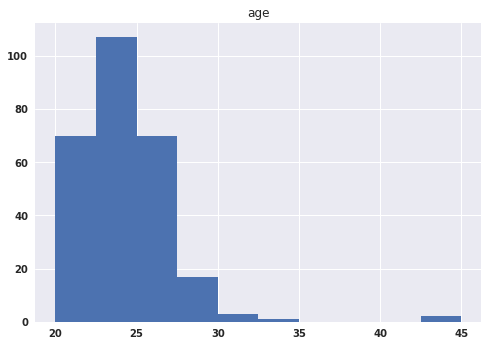

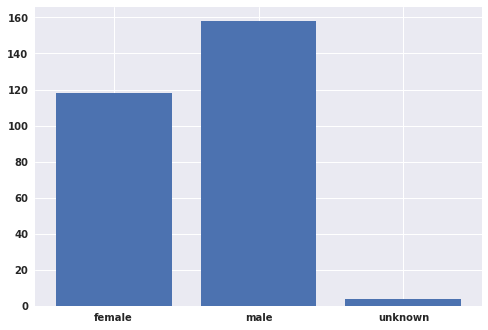

In [10]:
import os
if not os.path.exists('results/odi/'):
    os.makedirs('results/odi/')
    
from collections import Counter


def show_save_histogram(df, column_name):
    """ Makes and saves a histogram of a specific df column. """
    df.hist(column=column_name)
    plt.savefig("results/odi/" + column_name + ".png")



def make_bar_chart(df, column_name):
    """ Makes a bar chart given a data frame column. """
    
    freqs = Counter(df[column_name])
    xvals = range(len(freqs.values()))
    
    plt.figure()
    plt.bar(xvals, freqs.values())
    plt.xticks(xvals, freqs.keys())
    
    plt.savefig("results/odi/" + column_name + ".png")

show_save_histogram(df_new, "age")


make_bar_chart(df, "gender")


In [11]:
# Descriptives

# Age
mean_age = df_new.loc[:,"age"].mean()
print(f"mean age: {mean_age}")
std_age = df_new.loc[:,"age"].std()
print(f"standard deviation age: {std_age}")

# Neighbors
mean_neighbors = df_new.loc[:,"neighbors"].mean()
print(f"mean neighbors: {mean_neighbors}")
std_neighbors = df_new.loc[:,"neighbors"].std()
print(f"standard deviation neighbors: {std_neighbors}")

# Stress
mean_stress = df_new.loc[:,"stress"].mean()
print(f"mean stress: {mean_stress}")
std_stress = df_new.loc[:,"stress"].std()
print(f"standard deviation stress: {std_stress}")

# Random number
mean_random = df_new.loc[:,"random_number"].mean()
print(f"mean random: {mean_random}")
std_random = df_new.loc[:,"random_number"].std()
print(f"standard deviation random: {std_random}")

mean age: 24.118518518518517
standard deviation age: 2.7620687571743017
mean neighbors: 3.6496350364963503
standard deviation neighbors: 42.677097724610846
mean stress: 3.4452554744525545
standard deviation stress: 2.6655300912003344
mean random: 2.1214300401233584e+35
standard deviation random: 3.4534378759965964e+36


### Explore correlations with gender

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


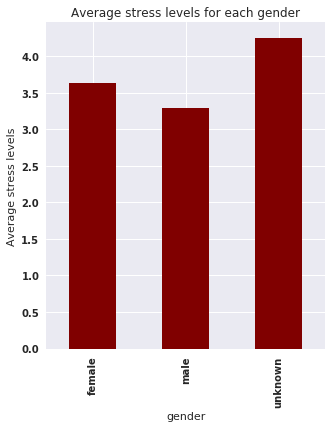

In [12]:
# Average stress for each gender
ax = plt.subplot()
ax.set_ylabel('Average stress levels')
ax.set_title('Average stress levels for each gender')
df_new.groupby('gender').mean()['stress'].plot(kind='bar', 
                                               figsize=(5, 6), 
                                               ax = ax,
                                               color="maroon");

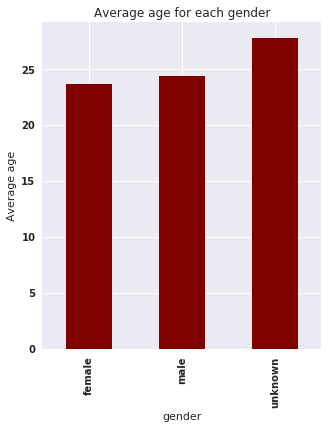

In [13]:
# Average age for each gender
ax = plt.subplot()
ax.set_ylabel('Average age')
ax.set_title('Average age for each gender')
df_new.groupby('gender').mean()['age'].plot(kind='bar', 
                                               figsize=(5, 6), 
                                               ax = ax,
                                               color="maroon");

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


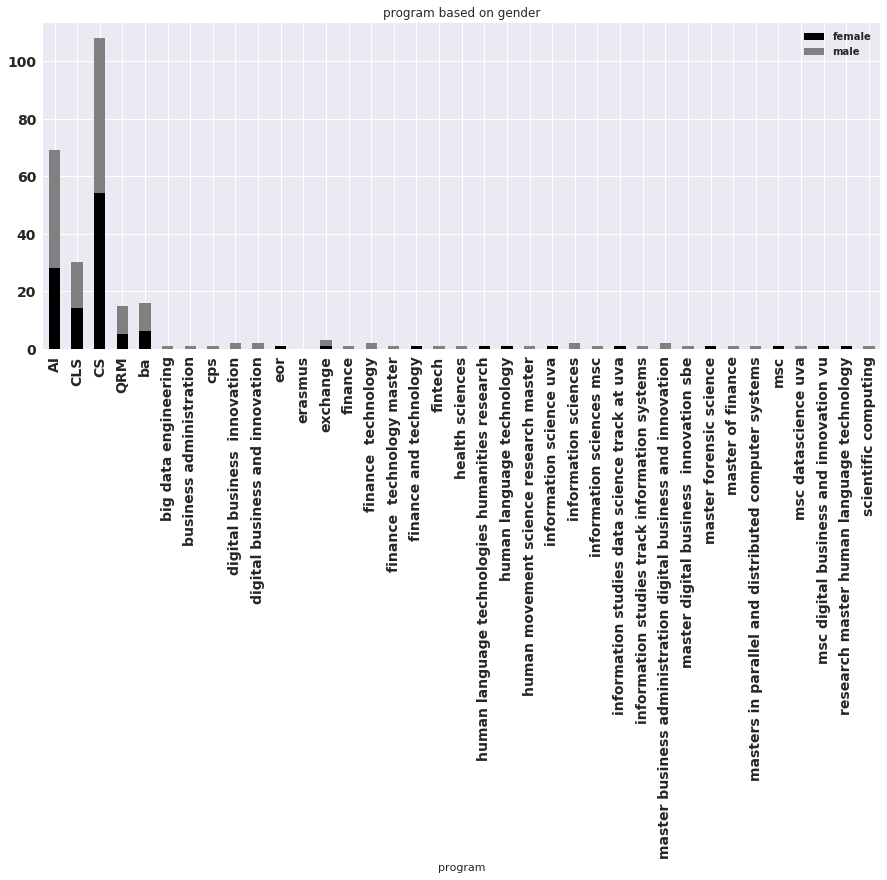

In [14]:
# Convert chocolate categories
try:
    df_new['gender'] = df_new['gender'].map( {'female': 0, 'male': 1, 'unknown': 2} ).astype(int)
    df_new['chocolate'] = df_new['chocolate'].map( {'fat': 0, 'neither': 1, 'I have no idea what you are talking about':2, 'slim':3, 'unknown': 4} ).astype(int)
except ValueError:
    print("already converted to int")
    
col_male, col_female = [], []
for index, row in df_new.iterrows():
    if row["gender"] == 1:
        col_male.append(1)
    else:
        col_male.append(0)
    
    if row["gender"] == 0:
        col_female.append(1)
    else:
        col_female.append(0)
    
try:
    df_new.insert(loc=0, column='male', value=pd.Series(col_male))
    df_new.insert(loc=0, column='female', value=pd.Series(col_female))   
except ValueError:
    print("Already added col")


plot = df_new.groupby('program').agg('sum')[['female', 'male']].plot(kind='bar', 
                                                                    fontsize=14, 
                                                                    figsize=(15, 6),
                                                                    stacked=True, 
                                                                    color=['black', 'grey'],
                                                                    title="program based on gender");

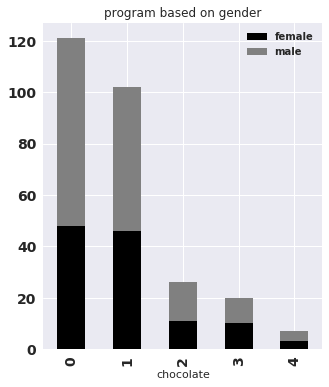

In [15]:
plot = df_new.groupby('chocolate').agg('sum')[['female', 'male']].plot(kind='bar', 
                                                                    fontsize=14, 
                                                                    figsize=(5, 6),
                                                                    stacked=True, 
                                                                    color=['black', 'grey'],
                                                                    title="program based on gender");

In [ ]:
plot = df_new.groupby('stress').agg('sum')[['female', 'male']].plot(kind='bar', 
                                                                    fontsize=14, 
                                                                    figsize=(15, 6),
                                                                    stacked=True, 
                                                                    color=['black', 'grey'],
                                                                    title="program based on gender");

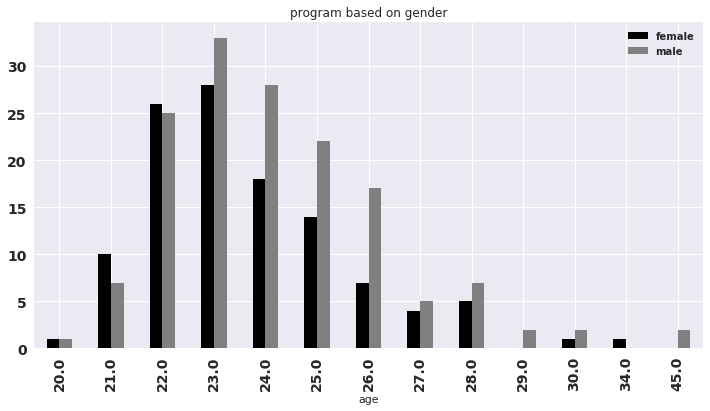

In [23]:
plot = df_new.groupby('age').agg('sum')[['female', 'male']].plot(kind='bar', 
                                                                    fontsize=14, 
                                                                    figsize=(12, 6),
                                                                    stacked=False, 
                                                                    color=['black', 'grey'],
                                                                    title="program based on gender");

In [22]:
df_new.groupby('age').agg('sum')[['female', 'male']]

,female,male
age,,
20.0,1,1
21.0,10,7
22.0,26,25
23.0,28,33
24.0,18,28
25.0,14,22
26.0,7,17
27.0,4,5
28.0,5,7


In [17]:
display(df_new)

,female,male,program,ml_course,ir_course,stat_course,db_course,gender,chocolate,birthday,...,stress,local_dm_comp,random_number,bedtime_yesterday,happy1,happy2,age,sun,food,stress_band
0,1,0,CLS,no,unknown,mu,ja,0,0,1998-08-05,...,0.0,4,227,22:30:00,Good weather,Sporting,21.0,1,0,"(-0.1, 16.667]"
1,0,1,QRM,no,0,mu,nee,1,4,1996-01-01,...,8.0,25,65,23:05:00,chill,coffee,24.0,0,0,"(83.333, 100.0]"
2,1,0,CLS,no,0,mu,ja,0,1,1996-01-01,...,4.0,10,3,NaN,Waking up early and preparing for the day by p...,Using the early morning time to study,24.0,0,0,"(33.333, 50.0]"
3,1,0,QRM,no,0,mu,nee,0,1,1994-06-19,...,0.0,99,2,NaN,eating good food,spending time with friends,25.0,0,1,"(-0.1, 16.667]"
4,0,1,ba,yes,0,mu,ja,1,1,1993-09-29,...,5.0,80,7,22:00:00,Sun is shining,Intimate contact with friends and family,26.0,1,0,"(50.0, 66.667]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
275,0,1,AI,yes,1,mu,nee,1,0,1993-09-17,...,6.0,5,6,NaN,no corona,no corona 2,26.0,0,0,"(66.667, 83.333]"
276,0,1,CS,no,0,mu,ja,1,0,1993-09-17,...,0.0,100,7,21:45:00,Netflix,Chill,26.0,0,0,"(-0.1, 16.667]"
277,0,1,AI,yes,1,mu,ja,1,1,1994-07-26,...,5.0,75,42,13:37:00,Finishing all tasks,Finding an extra package of ice cream,25.0,0,0,"(50.0, 66.667]"
278,1,0,AI,no,0,mu,nee,0,1,1998-04-03,...,6.0,2,69,00:00:00,Food,Orgasm,22.0,0,1,"(66.667, 83.333]"
